In [49]:
import pandas as pd
import pickle
from datetime import datetime

pd.set_option('display.max_colwidth', None)
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()


In [2]:
df = pd.read_csv("df_covid_polarity.csv")

In [18]:


def read_probs(probs):      
    """return te probability array with lists"""
    #remove double space and '[' and ']'
    probs = " ".join(probs[1:-1].split())
    return [eval(p) for p in probs.split(" ")]

def read_date(datetime_str):
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

df["probs"]= [read_probs(p) for p in df["probs"]]
df["datetime"]= [read_date(p) for p in df["datetime"]]
df["date"]= [d.date() for d in df["datetime"]]




NameError: name 'df' is not defined

In [5]:
df["negatif"] = [1 if b else 0 for b in df.predictions==0] #1 if prediction == 0
df["positif"] = [1 if b else 0 for b in df.predictions==1] #1 if prediction == 1
df["neutre"] =  [1 if b else 0 for b in df.predictions==2] #1 if prediction == 2
df["count_dummy"]=1

In [6]:
df.head()

,lang,text,username,search_url,datetime,replies,retweets,likes,is_share,predictions,probs,date,negatif,positif,neutre,count_dummy
0,fr,Ça continue 400 masques volés dans un service ...,SBurtey,https://twitter.com/search?q=epidemie%20until%...,2020-03-04 10:45:20,79,1265,3071,False,0,"[0.99528295, 0.00160004, 0.00311696]",2020-03-04,1,0,0,1
1,fr,La France : a atteint le stade 3 de l ' épidé...,RayanSmd,https://twitter.com/search?q=epidemie%20until%...,2020-03-04 17:01:40,16,420,2063,False,0,"[0.574801, 0.00846368, 0.4167353]",2020-03-04,1,0,0,1
2,fr,On est chez les fous ! Le 17 fev Macron affr...,valerieboyer13,https://twitter.com/search?q=epidemie%20until%...,2020-03-04 20:32:25,107,933,1061,False,0,"[0.9915228, 0.00149084, 0.00698637]",2020-03-04,1,0,0,1
3,fr,"Avant, on avait des foyers d ' épidémie . Mai...",Aramisunchained,https://twitter.com/search?q=epidemie%20until%...,2020-03-04 22:47:23,37,191,590,False,2,"[0.01078166, 0.00972643, 0.97949183]",2020-03-04,0,0,1,1
4,fr,ça mbute yen a ils ont vraiment attendu une ép...,marinelbars,https://twitter.com/search?q=epidemie%20until%...,2020-03-04 20:16:01,6,1618,5347,False,0,"[0.99441344, 0.00174143, 0.00384523]",2020-03-04,1,0,0,1


In [7]:
df_negatif = df[["date","negatif"]]
df_positif = df[["date","positif"]]
df_neutre = df[["date","neutre"]]
df_count = df[["date","count_dummy","negatif","positif","neutre"]]

In [8]:
df_agg = df_count.groupby("date").agg("sum")

<AxesSubplot:title={'center':'number of covid related tweets'}, xlabel='date'>

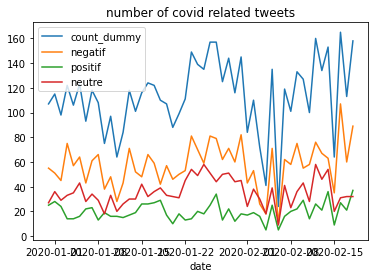

In [17]:
df_agg[:50].plot(title = "number of covid related tweets")

<AxesSubplot:title={'center':'proportion negatif'}, xlabel='date'>

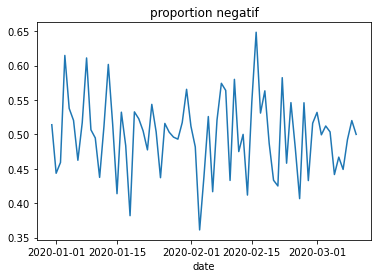

In [9]:
(df_agg.negatif/df_agg.count_dummy).plot(title = "proportion negatif")

<AxesSubplot:title={'center':'proportion positif'}, xlabel='date'>

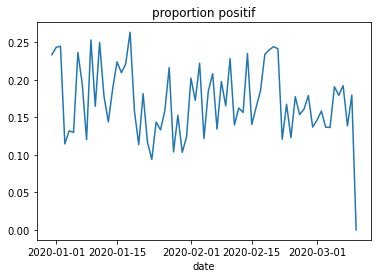

In [180]:
(df_agg.positif/df_agg.count_dummy).plot(title = "proportion positif")

<AxesSubplot:title={'center':'proportion neutre'}, xlabel='date'>

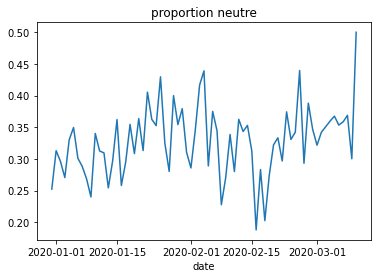

In [181]:
(df_agg.neutre/df_agg.count_dummy).plot(title = "proportion neutre")

<AxesSubplot:title={'center':'proportion neutre'}, xlabel='date'>

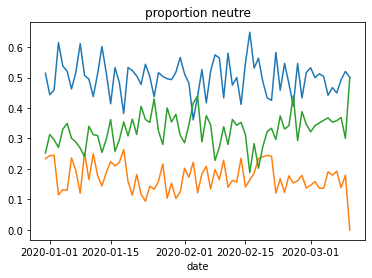

In [183]:
(df_agg.negatif/df_agg.count_dummy).plot(title = "proportion negatif")
(df_agg.positif/df_agg.count_dummy).plot(title = "proportion positif")
(df_agg.neutre/df_agg.count_dummy).plot(title = "proportion neutre")

## study emotions 

In [50]:
df_emotions=pickle.load(open('/home/hamza/3A_projets/filiere/saved_data/df_covid_emotions.pkl','rb'))
df_got_emotions=pickle.load(open('/home/hamza/3A_projets/filiere/saved_data/df_got_emotions.pkl','rb'))

In [51]:
emotions = ["N", "VALORISATION",
"DEVALORISATION",
"PEUR",
"DESACCORD",
"COLERE",
"ACCORD",
"MEPRIS"]
dict_map = dict(zip(range(len(emotions)),emotions))
df_emotions['emotions'] = df_emotions['predictions'].map(dict_map)
df_got_emotions['emotions'] = df_got_emotions['predictions'].map(dict_map)

In [48]:
len(df_emotions)

12325

## stats 

In [52]:
def get_date(datetime_str , got=False):
    if got : 
        return datetime.strptime(datetime_str[:-6], '%Y-%m-%d %H:%M:%S').date()
    return datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S').date()

In [53]:
df_emotions['date']=df_emotions.datetime.apply(get_date)
df_got_emotions['date']=df_got_emotions.datetime.apply(get_date , got=True)

In [54]:
#all_emotions = pd.concat([df_emotions[['date','emotions']],df_got_emotions[['date','emotions']]],ignore_index=True)

df_count = pd.merge(df_emotions['date'], pd.get_dummies(df_emotions['emotions']), right_index = True, 
               left_index = True) 
df_count["count_dummy"]=1
df_agg = df_count.groupby("date").agg("sum")[:-2]

In [55]:
df_agg

,ACCORD,COLERE,DESACCORD,DEVALORISATION,MEPRIS,N,PEUR,VALORISATION,count_dummy
date,,,,,,,,,
2019-12-31,0.0,5.0,0.0,15.0,0.0,64.0,6.0,17.0,107
2020-01-01,0.0,7.0,0.0,7.0,0.0,77.0,3.0,21.0,115
2020-01-02,0.0,6.0,0.0,8.0,0.0,63.0,6.0,15.0,98
2020-01-03,0.0,13.0,0.0,22.0,0.0,73.0,6.0,8.0,122
2020-01-04,0.0,6.0,0.0,10.0,0.0,79.0,5.0,6.0,106
...,...,...,...,...,...,...,...,...,...
2020-03-04,0.0,51.0,3.0,69.0,1.0,365.0,30.0,37.0,556
2020-03-05,0.0,39.0,4.0,56.0,0.0,425.0,40.0,70.0,634
2020-03-06,0.0,49.0,4.0,55.0,1.0,341.0,31.0,48.0,529


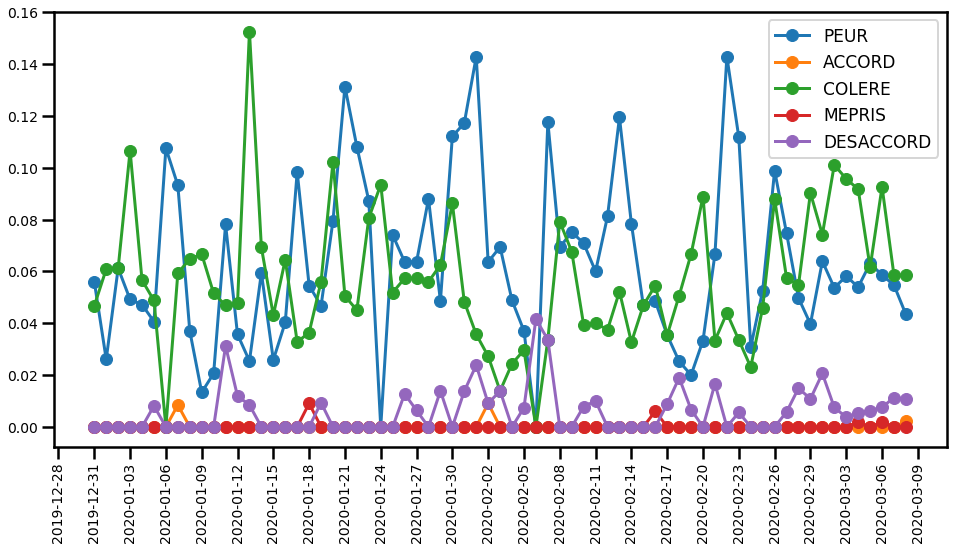

In [65]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(df_agg.index, df_agg.PEUR/df_agg.count_dummy , marker ='o' , label ='PEUR')
ax.plot(df_agg.index, df_agg.ACCORD/df_agg.count_dummy , marker ='o' , label ='ACCORD')
ax.plot(df_agg.index, df_agg.COLERE/df_agg.count_dummy , marker ='o' , label ='COLERE')
#ax.plot(df_agg.index, (df_agg.COLERE+df_agg.PEUR)/df_agg.count_dummy , marker ='o' , label ='PEUR + COLERE')
ax.plot(df_agg.index, df_agg.MEPRIS/df_agg.count_dummy , marker ='o' , label ='MEPRIS')
ax.plot(df_agg.index, df_agg.DESACCORD/df_agg.count_dummy , marker ='o' , label ='DESACCORD')

plt.legend(fontsize = 17)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))   #to get a tick every 15 minutes
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

ax.tick_params(axis='x', rotation=90 )


In [57]:
df=df_agg.PEUR/df_agg.count_dummy
len(df_emotions[(df_emotions.date == df.idxmax()) & (df_emotions.emotions=='PEUR' )]['text']

SyntaxError: unexpected EOF while parsing (<ipython-input-57-90c90413c087>, line 2)

## get prob 

,lang,text,username,search_url,datetime,replies,retweets,likes,is_share,predictions,probs,emotions,date
0,fr,Ça continue 400 masques volés dans un service où on voit des immunodéprimés tous les jours toute la journée où nous avons grâce à eux contrôlés une épidémie plus grave que covid19 . Vous qui faites ça vous êtes des salopards .,SBurtey,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 10:45:20,79,1265,3071,False,2,"[0.080742165, 0.00946647, 0.31341842, 0.02251911, 0.051768377, 0.27643004, 0.01973619, 0.22591923]",DEVALORISATION,2020-03-04
1,fr,La France : a atteint le stade 3 de l ' épidémie . Covid_19fr L ' éducation nationale :,RayanSmd,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 17:01:40,16,420,2063,False,0,"[0.98364246, 0.0069820867, 0.0044034566, 0.0010660959, 0.001022425, 0.0003782983, 0.0015233665, 0.0009818224]",N,2020-03-04
2,fr,"On est chez les fous ! Le 17 fev Macron affrète 17 tonnes de kits de protection, gel désinfectant pour Wuhan Cette semaine l ' épidémie se propage en France et pas de matériel de protection pour les prof de santé libéraux, médecine de ville . Macron""réquisitionne tous les stocks""",valerieboyer13,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 20:32:25,107,933,1061,False,5,"[0.019363677, 0.0044656885, 0.2850146, 0.033526734, 0.05655427, 0.37486959, 0.01586481, 0.21034059]",COLERE,2020-03-04
3,fr,"Avant, on avait des foyers d ' épidémie . Maintenant, on a des "" clusters "" d ' épidémie . Ça fait vachement plus start-up nation . . .",Aramisunchained,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 22:47:23,37,191,590,False,0,"[0.9463729, 0.044754088, 0.0027441746, 0.0006879276, 0.0009388859, 0.00050860347, 0.0026103342, 0.0013830794]",N,2020-03-04
4,fr,ça mbute yen a ils ont vraiment attendu une épidémie pour être propre,marinelbars,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 20:16:01,6,1618,5347,False,0,"[0.47630513, 0.013350003, 0.24877702, 0.011441559, 0.032817364, 0.089394614, 0.015699403, 0.11221488]",N,2020-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12320,fr,EPIDEMIE - Il y a actuellement 999 cas de coronavirus confirmés hors de Chine . ( BNO ) COVID19,Conflits_FR,https://twitter.com/search?q=epidemie%20until%3A2020-02-19%20since%3A2020-02-18&src=typed_query,2020-02-18 18:09:49,28,56,194,False,0,"[0.98556376, 0.0073645986, 0.0028001466, 0.00065412355, 0.0008340215, 0.00033202747, 0.0015790251, 0.0008723332]",N,2020-02-18
12321,fr,Le bilan de l ' épidémie de Covid-19 dépasse les 1800 morts en Chine continentale,F24AsiePacifiq,https://twitter.com/search?q=epidemie%20until%3A2020-02-19%20since%3A2020-02-18&src=typed_query,2020-02-18 01:35:04,0,0,0,False,0,"[0.98334885, 0.0059885234, 0.005307314, 0.0012306034, 0.0011446477, 0.00041405013, 0.0015229873, 0.0010429305]",N,2020-02-18
12322,fr,"Voilà ce qu ' aurait dû dire Buzin ! Ça prenait 30 secondes à expliquer . Masques chirurgicaux FFP2 & FFP3 Mais ! Doivent être changés toutes les 5h, il y a pénurie, et si épidémie en France ils seront distribués C ' était compliqué à dire ça ?",DONTOMASIN0,https://twitter.com/search?q=epidemie%20until%3A2020-02-19%20since%3A2020-02-18&src=typed_query,2020-02-18 01:34:14,1,0,4,False,0,"[0.760715, 0.005481215, 0.17347471, 0.01422644, 0.013323807, 0.010850251, 0.005152854, 0.016775714]",N,2020-02-18
12323,fr,"Non non, tu vas juste te manger des commentaires de pharmaciens qui vont te dire que des ffp2 & ffp3 peuvent être commandés en pharmacie d ' habitude . Je dis bien d ' habitude car là c ' est la pénurie et si il y a épidémie l ' ARS fournira les pharmacies pour distribuer aux + fragiles",DONTOMASIN0,https://twitter.com/search?q=epidemie%20until%3A2020-02-19%20since%3A2020-02-18&src=t

In [39]:
wanted_emotions = ["PEUR",
"DESACCORD",
"COLERE",
"ACCORD",
"MEPRIS"]
new_emotions =[]
for index,rows in df_emotions.iterrows():
    probs = rows['probs']
    if rows['emotions'] in ['DEVALORISATION','VALORISATION','N'] :
        argmaxes_ = probs.argsort()[-3:][::-1]
        second_best = probs[argmaxes_[1]]
        if (second_best > 0.25) and (dict_map[argmaxes_[1]] in  wanted_emotions ) : 
            emotion = dict_map[argmaxes_[1]]
            #print('sentence is :', rows['text'])
            #print('second emotion is :',emotion) 
            new_emotions.append(emotion)
    else : 
        new_emotions.append(rows['emotions'])
df_emotions = []    
new_got_emotions = []
for index,rows in df_got_emotions.iterrows():
    probs = rows['probs']
    if rows['emotions'] in ['DEVALORISATION','VALORISATION','N'] :
        argmaxes_ = probs.argsort()[-3:][::-1]
        second_best = probs[argmaxes_[1]]
        if (second_best > 0.25) and (dict_map[argmaxes_[1]] in  wanted_emotions ) : 
            emotion = dict_map[argmaxes_[1]]
            #print('sentence is :', rows['text'])
            #print('second emotion is :',emotion) 
            new_got_emotions.append(emotion)
    else : 
        new_got_emotions.append(rows['emotions'])
            

In [47]:
df_emotions[df_emotions.emotions == 'COLERE'][:50]

,lang,text,username,search_url,datetime,replies,retweets,likes,is_share,predictions,probs,emotions,date
2,fr,"On est chez les fous ! Le 17 fev Macron affrète 17 tonnes de kits de protection, gel désinfectant pour Wuhan Cette semaine l ' épidémie se propage en France et pas de matériel de protection pour les prof de santé libéraux, médecine de ville . Macron""réquisitionne tous les stocks""",valerieboyer13,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 20:32:25,107,933,1061,False,5,"[0.019363677, 0.0044656885, 0.2850146, 0.033526734, 0.05655427, 0.37486959, 0.01586481, 0.21034059]",COLERE,2020-03-04
15,fr,"Allez c ' est bon là . Bien sûr que y ' a une épidémie . Arrêtez de prendre les francais pour des cons avec les phrases du gouvernement . ""La menace"" . Mais enfin, ya 45 nouveaux cas aujourd ' hui . Oui la France est infectée, comme tous les autres . Point . Vérité et Humilité putain ! Pardon .",AzzarovLeila,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 15:55:50,0,0,0,False,5,"[0.045862164, 0.017827734, 0.083406426, 0.017175859, 0.05759217, 0.44014463, 0.039845806, 0.29814523]",COLERE,2020-03-04
35,fr,OLPSG . . c ' est dégueulasse et l ' épidémie ? ?,aldo_platini,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 13:00:59,0,0,1,False,5,"[0.015303008, 0.006058689, 0.28091872, 0.027397603, 0.05275977, 0.38420907, 0.017996116, 0.21535705]",COLERE,2020-03-04
77,fr,Mais pourquoi ils sont autant choqué ? Le but de cette épidémie c ' est de réduire la densité de la population en Afrique ou quoi ? Très louche cette histoire,Housss783,https://twitter.com/search?q=epidemie%20until%3A2020-03-05%20since%3A2020-03-04&src=typed_query,2020-03-04 02:22:01,0,0,5,False,5,"[0.020481056, 0.013403109, 0.07564891, 0.018336399, 0.060167126, 0.5122853, 0.03168425, 0.2679939]",COLERE,2020-03-04
100,fr,"Les gars qui font la blague en mode ""t ' es sûre t ' as pas le coronavirus ? "" alors que non stop j ' ai juste la grippe arrêtez svp c ' était deja pas drole la première fois et la ça fait 15 fois qu ' on me le dit .",charline1073,https://twitter.com/search?q=grippe%20until%3A2020-01-29%20since%3A2020-01-28&src=typed_query,2020-01-28 22:56:39,1,2,17,False,5,"[0.034179926, 0.017324446, 0.07169717, 0.017285028, 0.060621995, 0.45958745, 0.03959153, 0.29971245]",COLERE,2020-01-28
102,fr,"taux de mortalité 2,7 % même la grippe tue plus de gens chaque année donc je panique plus",_candicew,https://twitter.com/search?q=grippe%20until%3A2020-01-29%20since%3A2020-01-28&src=typed_query,2020-01-28 23:02:30,0,4,20,False,5,"[0.009407359, 0.0062747705, 0.118330285, 0.0430976, 0.054468334, 0.51638687, 0.024510153, 0.22752462]",COLERE,2020-01-28
128,fr,"J ' ai survécu a la grippe aviaire le virus H1N1, la vache folle, . . . . le coronavirus même pas peur revanche j ' ai peur de pas survivre a la conneries humaine . . .",RunnerLife35,https://twitter.com/search?q=grippe%20until%3A2020-01-29%20since%3A2020-01-28&src=typed_query,2020-01-28 18:33:25,1,1,21,False,5,"[0.023968225, 0.007772639, 0.16769575, 0.017972467, 0.06289286, 0.43629587, 0.023446321, 0.2599559]",COLERE,2020-01-28
136,fr,La blague du moment sur le twitter Japon : Douanier : Halte-là ! C ' est quoi ça ? Carlos : Je suis une contrebasse ! Douanier : Ok vous pouvez partir ! Et vous ? Coronavirus : Je suis le virus de la grippe ! Douanier : Ok vous pouvez rentrer .,Goldengreg,https://twitter.com/search?q=grippe%20until%3A2020-01-29%20since%3A2020-01-28&src=typed_query,2020-01-28 15:53:33,2,24,70,False,5,"[0.0290468, 0.016423725, 0.061891694, 0.01741409, 0.06156908, 0.48321208, 0.03968127, 0.29076132]",COLERE,2020-01-28
150,fr,"PeurSurLeLac Après l ' épidémie, la prise d ' otages, c ' est quoi le prochain épisode ? Un séisme ? Une éruption volcanique ? ? ?",Mouettemoqueuse,https://twitter.com/search?q=epidemie%20until%3A2020-01-17%20

In [45]:
for index,rows in df_emotions.iterrows():
    if 'coronavirus' in rows['text'].split() :
        print(rows['text'])
        print('\n')

Keep calm and wash your hands Les différents scénarios de l ' épidémie sont dans L ' Express de la semaine .   ( Et même si c ' est un peu la psychose, c ' est un autre Hitchcock qui sert de référence ;- )  coronavirus


Épidémie de coronavirus - En France, à 16H, les régions les plus touchées sont  :  - Hauts-de-France  ( 65 cas )  - Île-de-France  ( 55 cas )  - Auvergne-Rhône-Alpes  ( 49 cas )  - Grand Est  ( 38 cas )


Wuhan avant et après l ' épidémie de coronavirus AFP


Buzyn a préparé l ' épidémie du coronavirus bien avant que ce virus arrive en France nous dit-elle, elle a fait des stocks de masques et oups  !    .  .  .   La petite gaffe  .  .  .   elle les a expédiés en Chine .


Les hôpitaux de Wuhan ont affirmé qu ' il y avait à présent plus de lits vides que de patients atteints du COVID19 .  Bien que les médecins estiment que la fin tant attendue de l ' épidémie est proche, la bataille n ' est pas terminée pour autant .  coronavirus


Des célébrités et agences nient leur 